In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [12]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [13]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.553806,1.800475,-0.857373,2.340704,-1.306774,1
1,-1.795615,-0.409935,-0.440218,2.009880,-1.517124,1
2,0.796824,3.081789,-1.025497,-1.940535,-0.692351,0
3,-0.787490,1.974455,0.284883,0.270676,0.094200,0
4,0.078029,0.469687,1.574709,0.326564,0.600160,1


In [14]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [15]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [16]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [17]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\Kirti Shendge\AppData\Local\Temp\ipykernel_18144\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [18]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\Kirti Shendge\AppData\Local\Temp\ipykernel_18144\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [19]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Kirti Shendge\AppData\Local\Temp\ipykernel_18144\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [20]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col4', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')
Index(['col2', 'col1', 'target'], dtype='object')


In [21]:
df3

,col2,col1,target
28,1.304668,-0.673063,1
54,-0.072710,-0.088203,0
26,0.629096,-0.006342,1
79,2.871272,-0.663475,0
85,2.982496,-0.295960,0
56,2.012250,0.734399,0
84,1.724643,-0.387838,1
68,2.829505,0.696340,0
49,2.838252,-2.430529,0
8,1.761526,0.536928,0


In [22]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [23]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [24]:
from sklearn.tree import plot_tree

[Text(0.5416666666666666, 0.9285714285714286, 'x[0] <= 0.45\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= -3.545\ngini = 0.34\nsamples = 23\nvalue = [5, 18]'),
 Text(0.3958333333333333, 0.8571428571428572, 'True  '),
 Text(0.16666666666666666, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[0] <= -0.129\ngini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 2.017\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.08333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.25, 0.35714285714285715, 'x[1] <= 2.335\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.5, 'x[0] <= 0.188\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'

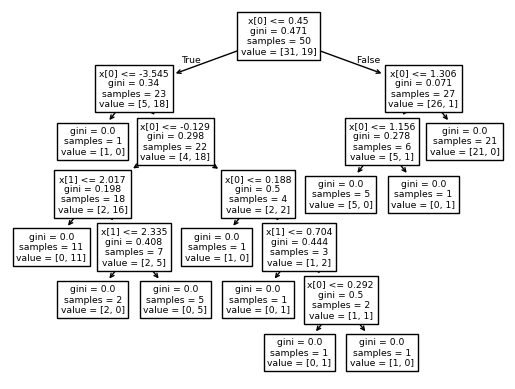

In [25]:
plot_tree(clf1)

[Text(0.6, 0.9583333333333334, 'x[1] <= 2.002\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.3333333333333333, 0.875, 'x[1] <= -0.81\ngini = 0.473\nsamples = 39\nvalue = [15, 24]'),
 Text(0.4666666666666667, 0.9166666666666667, 'True  '),
 Text(0.26666666666666666, 0.7916666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4, 0.7916666666666666, 'x[0] <= -3.832\ngini = 0.415\nsamples = 34\nvalue = [10, 24]'),
 Text(0.3333333333333333, 0.7083333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4666666666666667, 0.7083333333333334, 'x[0] <= 1.052\ngini = 0.375\nsamples = 32\nvalue = [8, 24]'),
 Text(0.4, 0.625, 'x[0] <= -0.68\ngini = 0.35\nsamples = 31\nvalue = [7, 24]'),
 Text(0.3333333333333333, 0.5416666666666666, 'x[0] <= -0.861\ngini = 0.403\nsamples = 25\nvalue = [7.0, 18.0]'),
 Text(0.26666666666666666, 0.4583333333333333, 'x[0] <= -2.044\ngini = 0.34\nsamples = 23\nvalue = [5, 18]'),
 Text(0.13333333333333333, 0.375, 'x[1] <= -0.476\ngini = 0.5

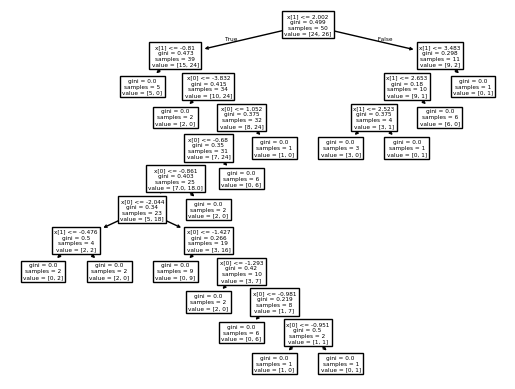

In [26]:
plot_tree(clf2)

[Text(0.6710526315789473, 0.9444444444444444, 'x[0] <= 1.743\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.5, 0.8333333333333334, 'x[0] <= 0.226\ngini = 0.496\nsamples = 33\nvalue = [15, 18]'),
 Text(0.5855263157894737, 0.8888888888888888, 'True  '),
 Text(0.3157894736842105, 0.7222222222222222, 'x[1] <= -4.173\ngini = 0.401\nsamples = 18\nvalue = [13, 5]'),
 Text(0.2631578947368421, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3684210526315789, 0.6111111111111112, 'x[0] <= 0.062\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.2631578947368421, 0.5, 'x[1] <= -0.92\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.21052631578947367, 0.3888888888888889, 'x[1] <= -1.314\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.15789473684210525, 0.2777777777777778, 'x[1] <= -2.067\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.10526315789473684, 0.16666666666666666, 'x[1] <= -3.054\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.

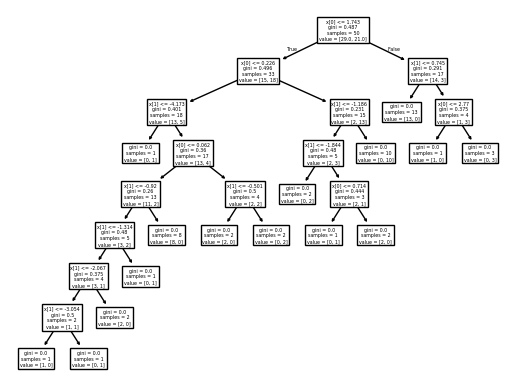

In [27]:
plot_tree(clf3)

In [28]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [29]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [30]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [31]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
1,-1.795615,-0.409935,-0.440218,2.009880,-1.517124,1
65,-1.095135,-2.792365,1.602816,2.258530,3.065163,0
52,-1.424032,0.620597,-0.667348,3.110792,-1.486305,1
24,-2.062884,2.479017,1.075718,1.157893,0.486669,0
95,-1.065806,3.090044,0.951158,-0.034118,-2.089259,0
38,0.663099,0.171010,0.193847,0.423868,2.034883,0
37,-0.177713,2.566826,-1.177503,4.232273,-1.531783,1
43,0.189785,1.091244,2.262605,1.233091,0.508927,1
85,-0.295960,2.982496,-1.046200,-1.159510,0.608272,0
50,-1.360075,-1.895152,3.094542,4.157872,2.007142,0
